In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("cyberbullying_tweets.csv")
data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [3]:
data.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [4]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [5]:
data.shape

(47692, 2)

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [8]:
data.shape

(47692, 2)

In [9]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['cyberbullying_type']= label_encoder.fit_transform(data['cyberbullying_type'])
  
data['cyberbullying_type'].unique()

array([3, 2, 5, 4, 0, 1])

In [11]:
X = data['tweet_text'].values
y = data['cyberbullying_type'].values

In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    #print(i)
    news = re.sub('[^a-zA-Z]', ' ', X[i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if word not in stopwords.words('english')]
    news = ' '.join(news)
    corpus.append(news)

In [15]:
X[0], corpus[0]

('In other words #katandandre, your food was crapilicious! #mkr',
 'word katandandr food crapilici mkr')

In [16]:
!pip install imblearn
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline

In [17]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(corpus), y, test_size = 0.2, random_state = 24)

In [18]:
X_train.shape, X_test.shape

((38153,), (9539,))

In [19]:
X_train[0], y_train[0]

('obsurf teenag dodg rambl make assert assert zero evid refer quran hadith garbag',
 5)

In [20]:
X_test[0], y_test[0]

('iamth teacher far deep end good night', 3)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

results=[]

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [23]:
tfidf = TfidfVectorizer()
model = RandomForestClassifier()

In [24]:
x_train = tfidf.fit_transform(X_train)
x_test = tfidf.transform(X_test)

In [26]:
model = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
from imblearn.over_sampling import SMOTE
pipe_line = Pipeline([
                      ('tfidf', tfidf),
                      ('smote', SMOTE(random_state=12)),
                      ('model', model)
])

In [28]:
pipe_line

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                ('model',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        n_estimators=250, random_state=42))])

In [29]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                ('model',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        n_estimators=250, random_state=42))])

In [42]:
pred = pipe_line.predict(X_test)
print(accuracy_score(y_test, pred))
acc=accuracy_score(y_test, pred)
results.append(acc)

0.8272355592829437


In [32]:
import pickle

In [39]:
#pickle.dump(pipe_line, open("randomforest.pkl", 'wb'))

In [33]:
!pip install xgboost==1.1.1

In [34]:
import xgboost
from xgboost import XGBClassifier

In [35]:
xgb_model = XGBClassifier()
xgb_pipe_line = Pipeline([
                      ('tfidf', tfidf),
                      ('smote', SMOTE(random_state=12)),
                      ('model', xgb_model)
])

In [36]:
xgb_pipe_line.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [37]:
pred = xgb_pipe_line.predict(X_test)
acc=accuracy_score(y_test, pred)
results.append(acc)

print(accuracy_score(y_test, pred))

0.8457909634133557


In [38]:
pickle.dump(xgb_pipe_line, open("xgb.pkl", 'wb'))

In [39]:
xgboost.__version__

'1.1.1'

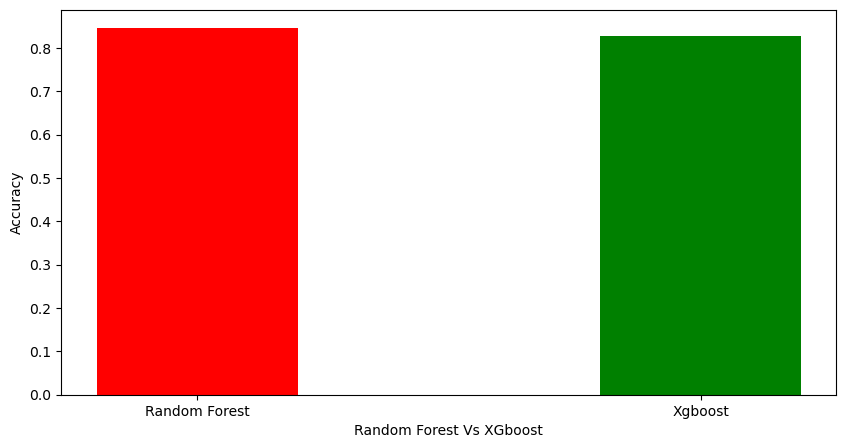

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

# creating the dataset
data = {'Random Forest':results[0],'Xgboost':results[1]}

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

colors = ['red', 'green']
# creating the bar plot
plt.bar(courses, values, color =colors,
        width = 0.4)
 
plt.xlabel("Random Forest Vs XGboost")
plt.ylabel("Accuracy")
plt.show()